# MODEL BUILDING

In [41]:
# Importing useful libraries
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics  import roc_auc_score,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [42]:
x_sampled.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,T3,TT4,T4U,FTI
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,126.0,2.0,110.0
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,103.0,2.0,109.0
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,110.0,2.0,121.0
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,176.0,2.0,178.0
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,62.0,2.0,71.0


In [43]:
x_sampled.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
T3                           0
TT4                          0
T4U                          0
FTI                          0
dtype: int64

In [44]:
y_sampled

0        1
1        1
2        1
3        1
4        1
        ..
13915    3
13916    3
13917    3
13918    3
13919    3
Name: Class, Length: 13920, dtype: int32

In [45]:
X_train,X_test,y_train,y_test=train_test_split(x_sampled,y_sampled,train_size=0.75, random_state = 70)

In [46]:
X_train.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'T3', 'TT4', 'T4U', 'FTI'],
      dtype='object')

# XGBOOST CLASSIFIER

In [49]:
def xgboost(train_x,train_y):
    
     xgb = XGBClassifier()

     # initializing with different combination of parameters
     param_grid_xgboost = {'tree_method': ['auto'],
                  "n_estimators": [10, 100, 120],
                  'booster' : ['dart', 'gbtree'],
#                   "criterion": ['gini', 'entropy'],
                  "max_depth": [2,3], 
#                   "max_features": ['auto', 'log2'],
                  'objective': ['binary:logistics'],
#                   'lambda' : range(1e-4,10),
                  'alpha' : (1e-4,1),
                  'colsample_bytree' : (.1, .5),
                  'subsample' : (.1, 1)
                
              
        
             }
    
     # object for Grid Search cv
     grid= GridSearchCV(xgb, param_grid_xgboost, verbose=3, cv=5)
    
     # finding the best parameters
     grid.fit(train_x, train_y)

     # getting best parameters
     booster = grid.best_params_['booster']
     tree_method = grid.best_params_['tree_method']
     n_estimators = grid.best_params_['n_estimators']
#      criterion = grid.best_params_['criterion']
     max_depth = grid.best_params_['max_depth']
#      max_features = grid.best_params_['max_features']
     objective = grid.best_params_['objective']
#      lambda = grid.best_params_['lambda']
     alpha = grid.best_params_['alpha']
     colsample_bytree = grid.best_params_['colsample_bytree']
     subsample = grid.best_params_['colsample_bytree']
     
   
     # creating a new model with the best parameters
     xgb = XGBClassifier(booster=booster, tree_method=tree_method, n_estimators=n_estimators,
                                max_depth=max_depth, objective=objective, alpha=alpha,
                                colsample_bytree=colsample_bytree, subsample=subsample)
    
     # training the mew model
     xgb.fit(train_x, train_y)
     print('Best parameters for XGBoost: {}'.format (grid.best_params_))


     return xgb

In [50]:
xgb_classifier = xgboost(X_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END alpha=0.0001, booster=dart, colsample_bytree=0.1, max_depth=2, n_estimators=10, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.775 total time=   0.1s
[CV 2/5] END alpha=0.0001, booster=dart, colsample_bytree=0.1, max_depth=2, n_estimators=10, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.789 total time=   0.0s
[CV 3/5] END alpha=0.0001, booster=dart, colsample_bytree=0.1, max_depth=2, n_estimators=10, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.797 total time=   0.0s
[CV 4/5] END alpha=0.0001, booster=dart, colsample_bytree=0.1, max_depth=2, n_estimators=10, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.770 total time=   0.0s
[CV 5/5] END alpha=0.0001, booster=dart, colsample_bytree=0.1, max_depth=2, n_estimators=10, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.780 total time=   0.0s
[CV 1/5]

[CV 5/5] END alpha=0.0001, booster=dart, colsample_bytree=0.1, max_depth=3, n_estimators=100, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.877 total time=   6.9s
[CV 1/5] END alpha=0.0001, booster=dart, colsample_bytree=0.1, max_depth=3, n_estimators=100, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.877 total time=   6.1s
[CV 2/5] END alpha=0.0001, booster=dart, colsample_bytree=0.1, max_depth=3, n_estimators=100, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.890 total time=   5.9s
[CV 3/5] END alpha=0.0001, booster=dart, colsample_bytree=0.1, max_depth=3, n_estimators=100, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.884 total time=   6.8s
[CV 4/5] END alpha=0.0001, booster=dart, colsample_bytree=0.1, max_depth=3, n_estimators=100, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.893 total time=   8.5s
[CV 5/5] END alpha=0.0001, booster=dart, colsample_bytree=0.1, max_depth=

[CV 5/5] END alpha=0.0001, booster=dart, colsample_bytree=0.5, max_depth=2, n_estimators=120, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.894 total time=   9.2s
[CV 1/5] END alpha=0.0001, booster=dart, colsample_bytree=0.5, max_depth=3, n_estimators=10, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.845 total time=   0.1s
[CV 2/5] END alpha=0.0001, booster=dart, colsample_bytree=0.5, max_depth=3, n_estimators=10, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.853 total time=   0.1s
[CV 3/5] END alpha=0.0001, booster=dart, colsample_bytree=0.5, max_depth=3, n_estimators=10, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.850 total time=   0.1s
[CV 4/5] END alpha=0.0001, booster=dart, colsample_bytree=0.5, max_depth=3, n_estimators=10, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.854 total time=   0.1s
[CV 5/5] END alpha=0.0001, booster=dart, colsample_bytree=0.5, max_dept

[CV 5/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.1, max_depth=2, n_estimators=100, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.866 total time=   0.5s
[CV 1/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.1, max_depth=2, n_estimators=100, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.858 total time=   0.4s
[CV 2/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.1, max_depth=2, n_estimators=100, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.881 total time=   0.4s
[CV 3/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.1, max_depth=2, n_estimators=100, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.868 total time=   0.6s
[CV 4/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.1, max_depth=2, n_estimators=100, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.883 total time=   0.5s
[CV 5/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.1

[CV 4/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.1, max_depth=3, n_estimators=120, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.898 total time=   0.4s
[CV 5/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.1, max_depth=3, n_estimators=120, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.890 total time=   0.4s
[CV 1/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.5, max_depth=2, n_estimators=10, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.823 total time=   0.0s
[CV 2/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.5, max_depth=2, n_estimators=10, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.849 total time=   0.0s
[CV 3/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.5, max_depth=2, n_estimators=10, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.832 total time=   0.0s
[CV 4/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.

[CV 3/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.5, max_depth=3, n_estimators=100, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.914 total time=   0.6s
[CV 4/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.5, max_depth=3, n_estimators=100, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.930 total time=   0.6s
[CV 5/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.5, max_depth=3, n_estimators=100, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.914 total time=   0.6s
[CV 1/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.5, max_depth=3, n_estimators=100, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.921 total time=   0.4s
[CV 2/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.5, max_depth=3, n_estimators=100, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.922 total time=   0.6s
[CV 3/5] END alpha=0.0001, booster=gbtree, colsample_bytree

[CV 3/5] END alpha=1, booster=dart, colsample_bytree=0.1, max_depth=2, n_estimators=120, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.868 total time=   9.4s
[CV 4/5] END alpha=1, booster=dart, colsample_bytree=0.1, max_depth=2, n_estimators=120, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.875 total time=  11.1s
[CV 5/5] END alpha=1, booster=dart, colsample_bytree=0.1, max_depth=2, n_estimators=120, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.881 total time=  14.5s
[CV 1/5] END alpha=1, booster=dart, colsample_bytree=0.1, max_depth=3, n_estimators=10, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.804 total time=   0.2s
[CV 2/5] END alpha=1, booster=dart, colsample_bytree=0.1, max_depth=3, n_estimators=10, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.813 total time=   0.2s
[CV 3/5] END alpha=1, booster=dart, colsample_bytree=0.1, max_depth=3, n_estimators=10, objective=

[CV 4/5] END alpha=1, booster=dart, colsample_bytree=0.5, max_depth=2, n_estimators=100, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.893 total time=  10.0s
[CV 5/5] END alpha=1, booster=dart, colsample_bytree=0.5, max_depth=2, n_estimators=100, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.885 total time=  10.0s
[CV 1/5] END alpha=1, booster=dart, colsample_bytree=0.5, max_depth=2, n_estimators=100, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.891 total time=  10.7s
[CV 2/5] END alpha=1, booster=dart, colsample_bytree=0.5, max_depth=2, n_estimators=100, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.902 total time=  10.5s
[CV 3/5] END alpha=1, booster=dart, colsample_bytree=0.5, max_depth=2, n_estimators=100, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.888 total time=  10.0s
[CV 4/5] END alpha=1, booster=dart, colsample_bytree=0.5, max_depth=2, n_estimators=100, objecti

[CV 5/5] END alpha=1, booster=dart, colsample_bytree=0.5, max_depth=3, n_estimators=120, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.936 total time=  14.7s
[CV 1/5] END alpha=1, booster=gbtree, colsample_bytree=0.1, max_depth=2, n_estimators=10, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.785 total time=   0.0s
[CV 2/5] END alpha=1, booster=gbtree, colsample_bytree=0.1, max_depth=2, n_estimators=10, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.813 total time=   0.0s
[CV 3/5] END alpha=1, booster=gbtree, colsample_bytree=0.1, max_depth=2, n_estimators=10, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.803 total time=   0.0s
[CV 4/5] END alpha=1, booster=gbtree, colsample_bytree=0.1, max_depth=2, n_estimators=10, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.787 total time=   0.0s
[CV 5/5] END alpha=1, booster=gbtree, colsample_bytree=0.1, max_depth=2, n_estimators=10

[CV 5/5] END alpha=1, booster=gbtree, colsample_bytree=0.1, max_depth=3, n_estimators=100, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.869 total time=   0.7s
[CV 1/5] END alpha=1, booster=gbtree, colsample_bytree=0.1, max_depth=3, n_estimators=100, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.872 total time=   0.4s
[CV 2/5] END alpha=1, booster=gbtree, colsample_bytree=0.1, max_depth=3, n_estimators=100, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.886 total time=   0.5s
[CV 3/5] END alpha=1, booster=gbtree, colsample_bytree=0.1, max_depth=3, n_estimators=100, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.878 total time=   0.5s
[CV 4/5] END alpha=1, booster=gbtree, colsample_bytree=0.1, max_depth=3, n_estimators=100, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.894 total time=   0.4s
[CV 5/5] END alpha=1, booster=gbtree, colsample_bytree=0.1, max_depth=3, n_estimators=10

[CV 5/5] END alpha=1, booster=gbtree, colsample_bytree=0.5, max_depth=2, n_estimators=120, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.901 total time=   0.7s
[CV 1/5] END alpha=1, booster=gbtree, colsample_bytree=0.5, max_depth=3, n_estimators=10, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.846 total time=   0.0s
[CV 2/5] END alpha=1, booster=gbtree, colsample_bytree=0.5, max_depth=3, n_estimators=10, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.865 total time=   0.0s
[CV 3/5] END alpha=1, booster=gbtree, colsample_bytree=0.5, max_depth=3, n_estimators=10, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.856 total time=   0.0s
[CV 4/5] END alpha=1, booster=gbtree, colsample_bytree=0.5, max_depth=3, n_estimators=10, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.845 total time=   0.0s
[CV 5/5] END alpha=1, booster=gbtree, colsample_bytree=0.5, max_depth=3, n_estimators=

In [51]:
xgb_classifier.score(X_test, y_test)

0.9295977011494253

In [54]:
y_proba = xgb_classifier.predict_proba(X_test)
y_pred = xgb_classifier.predict(X_test)

# RANDOM FOREST CLASSIFIER

In [49]:
def random_forest(train_x,train_y):

    rfc = RandomForestClassifier()

    # Providing different combination of parameters
    param_grid = {"n_estimators": [10, 20, 30,50, 70, 100, 120], 
                  "criterion": ['gini', 'entropy'],
                  "max_depth": range(2, 4, 1), 
                  "max_features": ['auto', 'log2'],
                  "ccp_alpha" : (1e-4, 10)
                  
                
                 }

    # object for GridSearchCV 
    grid = GridSearchCV(rfc, param_grid=param_grid, n_jobs= -1, verbose=3, cv=5)
    
    #finding the best parameters
    grid.fit(train_x, train_y)

    #getting best parameters
    criterion = grid.best_params_['criterion']
    max_depth = grid.best_params_['max_depth']
    ccp_alpha = grid.best_params_['ccp_alpha']
    max_features = grid.best_params_['max_features']
    n_estimators = grid.best_params_['n_estimators']
   

    #create new model with best parameters
    rfc = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion,
                                      max_depth=max_depth, ccp_alpha=ccp_alpha, max_features=max_features)
    # train new model
    rfc.fit(train_x, train_y)

    print('Best parameters for random forest are: {}'.format(grid.best_params_))

    return rfc


In [50]:
rfc_classifier = random_forest(X_train, y_train)

Fitting 5 folds for each of 112 candidates, totalling 560 fits
Best parameters for random forest are: {'ccp_alpha': 0.0001, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 70}


In [51]:
rfc_classifier.score(X_test, y_test)

0.8316091954022988

# K-NEIGHBORS CLASSIFIER

In [52]:
def KNN(train_x, train_y):
    
    knn = KNeighborsClassifier()

    # Providing different combination of parameters
    param_grid_knn = {
        'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
        'leaf_size' : [10,17,24,28,30,35],
        'n_neighbors':[4,5,8,10,11],
        'p':[1,2]
        
    }

    
    # Object for Grid Search cv
    grid = GridSearchCV(knn, param_grid_knn, cv=5, verbose=3)
    
    # finding the best parameters
    grid.fit(train_x, train_y)

    # getting best parameters
    algorithm =grid.best_params_['algorithm']
    leaf_size = grid.best_params_['leaf_size']
    n_neighbors = grid.best_params_['n_neighbors']
    p  = grid.best_params_['p']
    
    # creating a new model with the best parameters
    knn = KNeighborsClassifier(algorithm=algorithm, leaf_size=leaf_size, n_neighbors=n_neighbors, p=p, n_jobs=-1)
    
    # training the mew model
    knn.fit(train_x, train_y)
    print('Best Parameters for KNN: {}'.format(grid.best_params_))
    return knn


In [53]:
knn_classifier = KNN(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1;, score=0.945 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1;, score=0.945 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1;, score=0.943 total time=   0.1s
[CV 4/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1;, score=0.947 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1;, score=0.954 total time=   0.1s
[CV 1/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2;, score=0.952 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2;, score=0.947 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2;, score=0.945 total time=   0.1s
[CV 4/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2;, score=0.944 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, lea

[CV 4/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=10, p=1;, score=0.914 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=10, p=1;, score=0.912 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=10, p=2;, score=0.915 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=10, p=2;, score=0.912 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=10, p=2;, score=0.906 total time=   0.1s
[CV 4/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=10, p=2;, score=0.914 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=10, p=2;, score=0.914 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=11, p=1;, score=0.909 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=11, p=1;, score=0.913 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=11, p=1;, score=0.908 total tim

[CV 1/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=2;, score=0.952 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=2;, score=0.947 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=2;, score=0.944 total time=   0.1s
[CV 4/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=2;, score=0.943 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=2;, score=0.954 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=8, p=1;, score=0.918 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=8, p=1;, score=0.922 total time=   0.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=8, p=1;, score=0.919 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=8, p=1;, score=0.923 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=8, p=1;, score=0.925 total time=   0.1s


[CV 4/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=11, p=2;, score=0.908 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=11, p=2;, score=0.913 total time=   0.1s
[CV 1/5] END algorithm=ball_tree, leaf_size=35, n_neighbors=4, p=1;, score=0.946 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=35, n_neighbors=4, p=1;, score=0.944 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=35, n_neighbors=4, p=1;, score=0.938 total time=   0.1s
[CV 4/5] END algorithm=ball_tree, leaf_size=35, n_neighbors=4, p=1;, score=0.947 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=35, n_neighbors=4, p=1;, score=0.953 total time=   0.1s
[CV 1/5] END algorithm=ball_tree, leaf_size=35, n_neighbors=4, p=2;, score=0.952 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=35, n_neighbors=4, p=2;, score=0.948 total time=   0.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=35, n_neighbors=4, p=2;, score=0.945 total time=   0.0

[CV 2/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=1;, score=0.915 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=1;, score=0.909 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=1;, score=0.914 total time=   0.1s
[CV 5/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=1;, score=0.916 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=2;, score=0.915 total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=2;, score=0.912 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=2;, score=0.905 total time=   0.1s
[CV 4/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=2;, score=0.916 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=2;, score=0.913 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=11, p=1;, score=0.912 total time=   0.0s
[CV 2/5] E

[CV 1/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=5, p=2;, score=0.952 total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=5, p=2;, score=0.947 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=5, p=2;, score=0.945 total time=   0.1s
[CV 4/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=5, p=2;, score=0.945 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=5, p=2;, score=0.954 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=8, p=1;, score=0.919 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=8, p=1;, score=0.924 total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=8, p=1;, score=0.923 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=8, p=1;, score=0.921 total time=   0.1s
[CV 5/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=8, p=1;, score=0.928 total time=   0.0s
[CV 1/5] END algorit

[CV 5/5] END algorithm=kd_tree, leaf_size=28, n_neighbors=11, p=2;, score=0.912 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=1;, score=0.945 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=1;, score=0.943 total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=1;, score=0.941 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=1;, score=0.949 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=1;, score=0.955 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=2;, score=0.952 total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=2;, score=0.947 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=2;, score=0.945 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=2;, score=0.945 total time=   0.0s
[CV 5/5] END algori

[CV 4/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=1;, score=0.913 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=1;, score=0.917 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2;, score=0.915 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2;, score=0.912 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2;, score=0.905 total time=   0.1s
[CV 4/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2;, score=0.915 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2;, score=0.913 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=11, p=1;, score=0.909 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=11, p=1;, score=0.911 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=11, p=1;, score=0.910 total time=   0.0s
[CV 4/5] E

[CV 4/5] END algorithm=brute, leaf_size=17, n_neighbors=5, p=2;, score=0.943 total time=   0.5s
[CV 5/5] END algorithm=brute, leaf_size=17, n_neighbors=5, p=2;, score=0.954 total time=   0.5s
[CV 1/5] END algorithm=brute, leaf_size=17, n_neighbors=8, p=1;, score=0.921 total time=   0.6s
[CV 2/5] END algorithm=brute, leaf_size=17, n_neighbors=8, p=1;, score=0.921 total time=   0.6s
[CV 3/5] END algorithm=brute, leaf_size=17, n_neighbors=8, p=1;, score=0.917 total time=   0.6s
[CV 4/5] END algorithm=brute, leaf_size=17, n_neighbors=8, p=1;, score=0.922 total time=   0.6s
[CV 5/5] END algorithm=brute, leaf_size=17, n_neighbors=8, p=1;, score=0.925 total time=   0.6s
[CV 1/5] END algorithm=brute, leaf_size=17, n_neighbors=8, p=2;, score=0.925 total time=   0.5s
[CV 2/5] END algorithm=brute, leaf_size=17, n_neighbors=8, p=2;, score=0.925 total time=   0.5s
[CV 3/5] END algorithm=brute, leaf_size=17, n_neighbors=8, p=2;, score=0.917 total time=   0.4s
[CV 4/5] END algorithm=brute, leaf_size=

[CV 4/5] END algorithm=brute, leaf_size=28, n_neighbors=4, p=1;, score=0.944 total time=   0.6s
[CV 5/5] END algorithm=brute, leaf_size=28, n_neighbors=4, p=1;, score=0.950 total time=   0.6s
[CV 1/5] END algorithm=brute, leaf_size=28, n_neighbors=4, p=2;, score=0.953 total time=   0.5s
[CV 2/5] END algorithm=brute, leaf_size=28, n_neighbors=4, p=2;, score=0.947 total time=   0.4s
[CV 3/5] END algorithm=brute, leaf_size=28, n_neighbors=4, p=2;, score=0.945 total time=   0.5s
[CV 4/5] END algorithm=brute, leaf_size=28, n_neighbors=4, p=2;, score=0.944 total time=   0.5s
[CV 5/5] END algorithm=brute, leaf_size=28, n_neighbors=4, p=2;, score=0.954 total time=   0.5s
[CV 1/5] END algorithm=brute, leaf_size=28, n_neighbors=5, p=1;, score=0.941 total time=   0.6s
[CV 2/5] END algorithm=brute, leaf_size=28, n_neighbors=5, p=1;, score=0.942 total time=   0.6s
[CV 3/5] END algorithm=brute, leaf_size=28, n_neighbors=5, p=1;, score=0.937 total time=   0.6s
[CV 4/5] END algorithm=brute, leaf_size=

[CV 5/5] END algorithm=brute, leaf_size=30, n_neighbors=10, p=2;, score=0.913 total time=   0.5s
[CV 1/5] END algorithm=brute, leaf_size=30, n_neighbors=11, p=1;, score=0.913 total time=   0.6s
[CV 2/5] END algorithm=brute, leaf_size=30, n_neighbors=11, p=1;, score=0.912 total time=   0.6s
[CV 3/5] END algorithm=brute, leaf_size=30, n_neighbors=11, p=1;, score=0.908 total time=   0.6s
[CV 4/5] END algorithm=brute, leaf_size=30, n_neighbors=11, p=1;, score=0.910 total time=   0.6s
[CV 5/5] END algorithm=brute, leaf_size=30, n_neighbors=11, p=1;, score=0.914 total time=   0.6s
[CV 1/5] END algorithm=brute, leaf_size=30, n_neighbors=11, p=2;, score=0.914 total time=   0.4s
[CV 2/5] END algorithm=brute, leaf_size=30, n_neighbors=11, p=2;, score=0.910 total time=   0.5s
[CV 3/5] END algorithm=brute, leaf_size=30, n_neighbors=11, p=2;, score=0.904 total time=   0.5s
[CV 4/5] END algorithm=brute, leaf_size=30, n_neighbors=11, p=2;, score=0.910 total time=   0.4s
[CV 5/5] END algorithm=brute, 

In [54]:
knn_classifier.score(X_test, y_test)

0.9514367816091954

## code for predicting the best model

In [55]:
def best_model(train_x,train_y,test_x,test_y):

            knn= KNN(train_x,train_y)
            prediction_knn = knn.predict_proba(test_x) # Predictions using the KNN Model

            if len(test_y.unique()) == 1: #if there is only one label in y, then roc_auc_score returns error. We will use accuracy in that case
                knn_score = accuracy_score(test_y, prediction_knn)
                print('Accuracy for knn:' + str(knn_score))  # Log AUC
            else:
                knn_score = roc_auc_score(test_y, prediction_knn, multi_class='ovr') # AUC for KNN
                print('AUC for knn:' + str(knn_score)) # Log AUC

            # create best model for Random Forest
            r_f= random_forest(train_x,train_y)
            prediction_random_forest= r_f.predict_proba(test_x) # prediction using the Random Forest Algorithm

            if len(test_y.unique()) == 1:#if there is only one label in y, then roc_auc_score returns error. We will use accuracy in that case
                random_forest_score = accuracy_score((test_y),prediction_random_forest)
                print('Accuracy for RF:' + str(random_forest_score))
            else:
                random_forest_score = roc_auc_score((test_y), prediction_random_forest,multi_class='ovr') # AUC for Random Forest
                print('AUC for RF:' + str(random_forest_score))
                
            # Create best model for XGBoost
            xgb = xgboost(train_x, train_y)
            prediction_xgb = xgb.predict_proba(test_x) #Prediction using XGBoost model
            
            if len(test_y.unique()) == 1: 
                xgb_score = accuracy_score(test_y, prediction_xgb)
                print('Accuracy for XGBoost:' +str(xgb_score))
                
            else:
                xgb_score = roc_auc_score((test_y), prediction_xgb, multi_class = 'ovr')
                print('AUC for xgb: ' +str(xgb_score))


            #Finding best model out of random forest, KNN and XGBoost                
            if (random_forest_score > knn_score) and (random_forest_score > xgb_score):
                return "RandomForest", r_f
            elif (knn_score >  random_forest_score) and (knn_score > xgb_score):
                return "KNN", knn
            else:
                return "XGBoost", xgb
  

            raise Exception()

In [56]:
best_model_name, final_model = best_model(X_train,y_train,X_test,y_test)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1;, score=0.945 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1;, score=0.945 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1;, score=0.943 total time=   0.1s
[CV 4/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1;, score=0.947 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1;, score=0.954 total time=   0.1s
[CV 1/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2;, score=0.952 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2;, score=0.947 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2;, score=0.945 total time=   0.2s
[CV 4/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2;, score=0.944 total time=   0.1s
[CV 5/5] END algorithm=ball_tree, lea

[CV 4/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=10, p=1;, score=0.914 total time=   0.1s
[CV 5/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=10, p=1;, score=0.912 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=10, p=2;, score=0.915 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=10, p=2;, score=0.912 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=10, p=2;, score=0.906 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=10, p=2;, score=0.914 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=10, p=2;, score=0.914 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=11, p=1;, score=0.909 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=11, p=1;, score=0.913 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=11, p=1;, score=0.908 total tim

[CV 2/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=2;, score=0.947 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=2;, score=0.944 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=2;, score=0.943 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=2;, score=0.954 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=8, p=1;, score=0.918 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=8, p=1;, score=0.922 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=8, p=1;, score=0.919 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=8, p=1;, score=0.923 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=8, p=1;, score=0.925 total time=   0.1s
[CV 1/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=8, p=2;, score=0.926 total time=   0.0s


[CV 4/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=11, p=2;, score=0.908 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=11, p=2;, score=0.913 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=35, n_neighbors=4, p=1;, score=0.946 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=35, n_neighbors=4, p=1;, score=0.944 total time=   0.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=35, n_neighbors=4, p=1;, score=0.938 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=35, n_neighbors=4, p=1;, score=0.947 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=35, n_neighbors=4, p=1;, score=0.953 total time=   0.1s
[CV 1/5] END algorithm=ball_tree, leaf_size=35, n_neighbors=4, p=2;, score=0.952 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=35, n_neighbors=4, p=2;, score=0.948 total time=   0.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=35, n_neighbors=4, p=2;, score=0.945 total time=   0.0

[CV 3/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=1;, score=0.909 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=1;, score=0.914 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=1;, score=0.916 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=2;, score=0.915 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=2;, score=0.912 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=2;, score=0.905 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=2;, score=0.916 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=2;, score=0.913 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=11, p=1;, score=0.912 total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=11, p=1;, score=0.915 total time=   0.0s
[CV 3/5] E

[CV 2/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=5, p=2;, score=0.947 total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=5, p=2;, score=0.945 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=5, p=2;, score=0.945 total time=   0.1s
[CV 5/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=5, p=2;, score=0.954 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=8, p=1;, score=0.919 total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=8, p=1;, score=0.924 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=8, p=1;, score=0.923 total time=   0.1s
[CV 4/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=8, p=1;, score=0.921 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=8, p=1;, score=0.928 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=8, p=2;, score=0.925 total time=   0.0s
[CV 2/5] END algorit

[CV 1/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=1;, score=0.945 total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=1;, score=0.943 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=1;, score=0.941 total time=   0.1s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=1;, score=0.949 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=1;, score=0.955 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=2;, score=0.952 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=2;, score=0.947 total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=2;, score=0.945 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=2;, score=0.945 total time=   0.1s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=2;, score=0.954 total time=   0.0s
[CV 1/5] END algorit

[CV 5/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=1;, score=0.917 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2;, score=0.915 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2;, score=0.912 total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2;, score=0.905 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2;, score=0.915 total time=   0.1s
[CV 5/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2;, score=0.913 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=11, p=1;, score=0.909 total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=11, p=1;, score=0.911 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=11, p=1;, score=0.910 total time=   0.1s
[CV 4/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=11, p=1;, score=0.909 total time=   0.0s
[CV 5/5] E

[CV 5/5] END algorithm=brute, leaf_size=17, n_neighbors=5, p=2;, score=0.954 total time=   0.5s
[CV 1/5] END algorithm=brute, leaf_size=17, n_neighbors=8, p=1;, score=0.921 total time=   0.6s
[CV 2/5] END algorithm=brute, leaf_size=17, n_neighbors=8, p=1;, score=0.921 total time=   0.6s
[CV 3/5] END algorithm=brute, leaf_size=17, n_neighbors=8, p=1;, score=0.917 total time=   0.7s
[CV 4/5] END algorithm=brute, leaf_size=17, n_neighbors=8, p=1;, score=0.922 total time=   0.6s
[CV 5/5] END algorithm=brute, leaf_size=17, n_neighbors=8, p=1;, score=0.925 total time=   0.6s
[CV 1/5] END algorithm=brute, leaf_size=17, n_neighbors=8, p=2;, score=0.925 total time=   0.4s
[CV 2/5] END algorithm=brute, leaf_size=17, n_neighbors=8, p=2;, score=0.925 total time=   0.5s
[CV 3/5] END algorithm=brute, leaf_size=17, n_neighbors=8, p=2;, score=0.917 total time=   0.5s
[CV 4/5] END algorithm=brute, leaf_size=17, n_neighbors=8, p=2;, score=0.925 total time=   0.4s
[CV 5/5] END algorithm=brute, leaf_size=

[CV 5/5] END algorithm=brute, leaf_size=28, n_neighbors=4, p=1;, score=0.950 total time=   0.6s
[CV 1/5] END algorithm=brute, leaf_size=28, n_neighbors=4, p=2;, score=0.953 total time=   0.4s
[CV 2/5] END algorithm=brute, leaf_size=28, n_neighbors=4, p=2;, score=0.947 total time=   0.5s
[CV 3/5] END algorithm=brute, leaf_size=28, n_neighbors=4, p=2;, score=0.945 total time=   0.4s
[CV 4/5] END algorithm=brute, leaf_size=28, n_neighbors=4, p=2;, score=0.944 total time=   0.5s
[CV 5/5] END algorithm=brute, leaf_size=28, n_neighbors=4, p=2;, score=0.954 total time=   0.4s
[CV 1/5] END algorithm=brute, leaf_size=28, n_neighbors=5, p=1;, score=0.941 total time=   0.7s
[CV 2/5] END algorithm=brute, leaf_size=28, n_neighbors=5, p=1;, score=0.942 total time=   0.6s
[CV 3/5] END algorithm=brute, leaf_size=28, n_neighbors=5, p=1;, score=0.937 total time=   0.6s
[CV 4/5] END algorithm=brute, leaf_size=28, n_neighbors=5, p=1;, score=0.946 total time=   0.6s
[CV 5/5] END algorithm=brute, leaf_size=

[CV 1/5] END algorithm=brute, leaf_size=30, n_neighbors=11, p=1;, score=0.913 total time=   0.7s
[CV 2/5] END algorithm=brute, leaf_size=30, n_neighbors=11, p=1;, score=0.912 total time=   0.7s
[CV 3/5] END algorithm=brute, leaf_size=30, n_neighbors=11, p=1;, score=0.908 total time=   0.6s
[CV 4/5] END algorithm=brute, leaf_size=30, n_neighbors=11, p=1;, score=0.910 total time=   0.6s
[CV 5/5] END algorithm=brute, leaf_size=30, n_neighbors=11, p=1;, score=0.914 total time=   0.7s
[CV 1/5] END algorithm=brute, leaf_size=30, n_neighbors=11, p=2;, score=0.914 total time=   0.4s
[CV 2/5] END algorithm=brute, leaf_size=30, n_neighbors=11, p=2;, score=0.910 total time=   0.4s
[CV 3/5] END algorithm=brute, leaf_size=30, n_neighbors=11, p=2;, score=0.904 total time=   0.5s
[CV 4/5] END algorithm=brute, leaf_size=30, n_neighbors=11, p=2;, score=0.910 total time=   0.5s
[CV 5/5] END algorithm=brute, leaf_size=30, n_neighbors=11, p=2;, score=0.911 total time=   0.5s
[CV 1/5] END algorithm=brute, 

[CV 2/5] END alpha=0.0001, booster=dart, colsample_bytree=0.1, max_depth=2, n_estimators=20, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.848 total time=   0.3s
[CV 3/5] END alpha=0.0001, booster=dart, colsample_bytree=0.1, max_depth=2, n_estimators=20, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.833 total time=   0.3s
[CV 4/5] END alpha=0.0001, booster=dart, colsample_bytree=0.1, max_depth=2, n_estimators=20, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.828 total time=   0.3s
[CV 5/5] END alpha=0.0001, booster=dart, colsample_bytree=0.1, max_depth=2, n_estimators=20, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.815 total time=   0.3s
[CV 1/5] END alpha=0.0001, booster=dart, colsample_bytree=0.1, max_depth=2, n_estimators=20, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.840 total time=   0.2s
[CV 2/5] END alpha=0.0001, booster=dart, colsample_bytree=0.1, max_depth

[CV 2/5] END alpha=0.0001, booster=dart, colsample_bytree=0.1, max_depth=2, n_estimators=100, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.881 total time=   5.8s
[CV 3/5] END alpha=0.0001, booster=dart, colsample_bytree=0.1, max_depth=2, n_estimators=100, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.871 total time=   6.7s
[CV 4/5] END alpha=0.0001, booster=dart, colsample_bytree=0.1, max_depth=2, n_estimators=100, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.875 total time=   5.5s
[CV 5/5] END alpha=0.0001, booster=dart, colsample_bytree=0.1, max_depth=2, n_estimators=100, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.872 total time=   5.5s
[CV 1/5] END alpha=0.0001, booster=dart, colsample_bytree=0.1, max_depth=2, n_estimators=120, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.870 total time=   8.0s
[CV 2/5] END alpha=0.0001, booster=dart, colsample_bytree=0.1, max_depth=

[CV 2/5] END alpha=0.0001, booster=dart, colsample_bytree=0.1, max_depth=3, n_estimators=50, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.858 total time=   1.5s
[CV 3/5] END alpha=0.0001, booster=dart, colsample_bytree=0.1, max_depth=3, n_estimators=50, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.860 total time=   1.6s
[CV 4/5] END alpha=0.0001, booster=dart, colsample_bytree=0.1, max_depth=3, n_estimators=50, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.858 total time=   1.6s
[CV 5/5] END alpha=0.0001, booster=dart, colsample_bytree=0.1, max_depth=3, n_estimators=50, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.855 total time=   1.6s
[CV 1/5] END alpha=0.0001, booster=dart, colsample_bytree=0.1, max_depth=3, n_estimators=50, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.874 total time=   1.6s
[CV 2/5] END alpha=0.0001, booster=dart, colsample_bytree=0.1, max_depth

[CV 3/5] END alpha=0.0001, booster=dart, colsample_bytree=0.5, max_depth=2, n_estimators=10, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.846 total time=   0.0s
[CV 4/5] END alpha=0.0001, booster=dart, colsample_bytree=0.5, max_depth=2, n_estimators=10, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.841 total time=   0.0s
[CV 5/5] END alpha=0.0001, booster=dart, colsample_bytree=0.5, max_depth=2, n_estimators=10, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.841 total time=   0.0s
[CV 1/5] END alpha=0.0001, booster=dart, colsample_bytree=0.5, max_depth=2, n_estimators=20, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.845 total time=   0.3s
[CV 2/5] END alpha=0.0001, booster=dart, colsample_bytree=0.5, max_depth=2, n_estimators=20, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.861 total time=   0.3s
[CV 3/5] END alpha=0.0001, booster=dart, colsample_bytree=0.5, max_depth=2, 

[CV 3/5] END alpha=0.0001, booster=dart, colsample_bytree=0.5, max_depth=2, n_estimators=100, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.886 total time=   5.9s
[CV 4/5] END alpha=0.0001, booster=dart, colsample_bytree=0.5, max_depth=2, n_estimators=100, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.891 total time=   5.8s
[CV 5/5] END alpha=0.0001, booster=dart, colsample_bytree=0.5, max_depth=2, n_estimators=100, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.885 total time=   6.7s
[CV 1/5] END alpha=0.0001, booster=dart, colsample_bytree=0.5, max_depth=2, n_estimators=100, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.904 total time=   5.6s
[CV 2/5] END alpha=0.0001, booster=dart, colsample_bytree=0.5, max_depth=2, n_estimators=100, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.900 total time=   5.5s
[CV 3/5] END alpha=0.0001, booster=dart, colsample_bytree=0.5, max_de

[CV 3/5] END alpha=0.0001, booster=dart, colsample_bytree=0.5, max_depth=3, n_estimators=30, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.885 total time=   0.6s
[CV 4/5] END alpha=0.0001, booster=dart, colsample_bytree=0.5, max_depth=3, n_estimators=30, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.883 total time=   0.7s
[CV 5/5] END alpha=0.0001, booster=dart, colsample_bytree=0.5, max_depth=3, n_estimators=30, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.885 total time=   0.6s
[CV 1/5] END alpha=0.0001, booster=dart, colsample_bytree=0.5, max_depth=3, n_estimators=50, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.895 total time=   1.9s
[CV 2/5] END alpha=0.0001, booster=dart, colsample_bytree=0.5, max_depth=3, n_estimators=50, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.900 total time=   1.9s
[CV 3/5] END alpha=0.0001, booster=dart, colsample_bytree=0.5, max_depth=3, 

[CV 3/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.1, max_depth=2, n_estimators=10, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.806 total time=   0.0s
[CV 4/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.1, max_depth=2, n_estimators=10, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.790 total time=   0.0s
[CV 5/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.1, max_depth=2, n_estimators=10, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.785 total time=   0.0s
[CV 1/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.1, max_depth=2, n_estimators=10, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.819 total time=   0.0s
[CV 2/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.1, max_depth=2, n_estimators=10, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.833 total time=   0.0s
[CV 3/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.1,

[CV 2/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.1, max_depth=2, n_estimators=70, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.876 total time=   0.1s
[CV 3/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.1, max_depth=2, n_estimators=70, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.866 total time=   0.1s
[CV 4/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.1, max_depth=2, n_estimators=70, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.865 total time=   0.1s
[CV 5/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.1, max_depth=2, n_estimators=70, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.859 total time=   0.1s
[CV 1/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.1, max_depth=2, n_estimators=100, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.855 total time=   0.4s
[CV 2/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.1, ma

[CV 1/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.1, max_depth=3, n_estimators=30, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.857 total time=   0.1s
[CV 2/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.1, max_depth=3, n_estimators=30, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.855 total time=   0.1s
[CV 3/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.1, max_depth=3, n_estimators=30, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.830 total time=   0.1s
[CV 4/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.1, max_depth=3, n_estimators=30, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.841 total time=   0.1s
[CV 5/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.1, max_depth=3, n_estimators=30, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.841 total time=   0.1s
[CV 1/5] END alpha=0.0001, booster=gbtree, colsample_bytree=

[CV 5/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.1, max_depth=3, n_estimators=120, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.871 total time=   0.5s
[CV 1/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.1, max_depth=3, n_estimators=120, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.887 total time=   0.3s
[CV 2/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.1, max_depth=3, n_estimators=120, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.897 total time=   0.3s
[CV 3/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.1, max_depth=3, n_estimators=120, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.886 total time=   0.3s
[CV 4/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.1, max_depth=3, n_estimators=120, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.894 total time=   0.3s
[CV 5/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.1

[CV 4/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.5, max_depth=2, n_estimators=50, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.882 total time=   0.1s
[CV 5/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.5, max_depth=2, n_estimators=50, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.881 total time=   0.1s
[CV 1/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.5, max_depth=2, n_estimators=70, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.880 total time=   0.3s
[CV 2/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.5, max_depth=2, n_estimators=70, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.887 total time=   0.3s
[CV 3/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.5, max_depth=2, n_estimators=70, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.876 total time=   0.3s
[CV 4/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.5,

[CV 3/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.5, max_depth=3, n_estimators=20, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.860 total time=   0.1s
[CV 4/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.5, max_depth=3, n_estimators=20, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.862 total time=   0.1s
[CV 5/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.5, max_depth=3, n_estimators=20, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.868 total time=   0.1s
[CV 1/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.5, max_depth=3, n_estimators=20, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.875 total time=   0.0s
[CV 2/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.5, max_depth=3, n_estimators=20, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.882 total time=   0.1s
[CV 3/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.5,

[CV 2/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.5, max_depth=3, n_estimators=100, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.918 total time=   0.4s
[CV 3/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.5, max_depth=3, n_estimators=100, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.916 total time=   0.4s
[CV 4/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.5, max_depth=3, n_estimators=100, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.919 total time=   0.5s
[CV 5/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.5, max_depth=3, n_estimators=100, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.923 total time=   0.4s
[CV 1/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.5, max_depth=3, n_estimators=120, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.920 total time=   0.6s
[CV 2/5] END alpha=0.0001, booster=gbtree, colsample_bytree=0.5

[CV 5/5] END alpha=0.0001, booster=gblinear, colsample_bytree=0.1, max_depth=2, n_estimators=20, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.632 total time=   0.0s
[01:45:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 1/5] END alpha=0.0001, booster=gblinear, colsample_bytree=0.1, max_depth=2, n_estimators=20, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.645 total time=   0.0s
[01:45:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 2/5] END alpha=0.0001, booster=gblinear, colsample_bytree=0.1, max_depth=2, n_estimators=20, objective=binary:logistics, sub

[CV 5/5] END alpha=0.0001, booster=gblinear, colsample_bytree=0.1, max_depth=2, n_estimators=50, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.638 total time=   0.1s
[01:46:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 1/5] END alpha=0.0001, booster=gblinear, colsample_bytree=0.1, max_depth=2, n_estimators=50, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.772 total time=   0.1s
[01:46:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 2/5] END alpha=0.0001, booster=gblinear, colsample_bytree=0.1, max_depth=2, n_estimators=50, objective=binary:logistics, sub

[CV 4/5] END alpha=0.0001, booster=gblinear, colsample_bytree=0.1, max_depth=2, n_estimators=100, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.778 total time=   0.2s
[01:46:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 5/5] END alpha=0.0001, booster=gblinear, colsample_bytree=0.1, max_depth=2, n_estimators=100, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.766 total time=   0.2s
[01:46:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 1/5] END alpha=0.0001, booster=gblinear, colsample_bytree=0.1, max_depth=2, n_estimators=100, objective=binary:logistics

[01:46:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 5/5] END alpha=0.0001, booster=gblinear, colsample_bytree=0.1, max_depth=3, n_estimators=10, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.625 total time=   0.0s
[01:46:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 1/5] END alpha=0.0001, booster=gblinear, colsample_bytree=0.1, max_depth=3, n_estimators=10, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.639 total time=   0.0s
[01:46:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-w

[CV 5/5] END alpha=0.0001, booster=gblinear, colsample_bytree=0.1, max_depth=3, n_estimators=30, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.635 total time=   0.0s
[01:46:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 1/5] END alpha=0.0001, booster=gblinear, colsample_bytree=0.1, max_depth=3, n_estimators=30, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.648 total time=   0.0s
[01:46:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 2/5] END alpha=0.0001, booster=gblinear, colsample_bytree=0.1, max_depth=3, n_estimators=30, objective=binary:logistics, sub

[CV 4/5] END alpha=0.0001, booster=gblinear, colsample_bytree=0.1, max_depth=3, n_estimators=70, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.774 total time=   0.1s
[01:46:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 5/5] END alpha=0.0001, booster=gblinear, colsample_bytree=0.1, max_depth=3, n_estimators=70, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.767 total time=   0.1s
[01:46:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 1/5] END alpha=0.0001, booster=gblinear, colsample_bytree=0.1, max_depth=3, n_estimators=70, objective=binary:logistics, s

[CV 3/5] END alpha=0.0001, booster=gblinear, colsample_bytree=0.1, max_depth=3, n_estimators=120, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.775 total time=   0.3s
[01:46:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 4/5] END alpha=0.0001, booster=gblinear, colsample_bytree=0.1, max_depth=3, n_estimators=120, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.785 total time=   0.2s
[01:46:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 5/5] END alpha=0.0001, booster=gblinear, colsample_bytree=0.1, max_depth=3, n_estimators=120, objective=binary:logistics

[01:46:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 3/5] END alpha=0.0001, booster=gblinear, colsample_bytree=0.5, max_depth=2, n_estimators=20, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.627 total time=   0.0s
[01:46:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 4/5] END alpha=0.0001, booster=gblinear, colsample_bytree=0.5, max_depth=2, n_estimators=20, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.646 total time=   0.0s
[01:46:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci

[CV 3/5] END alpha=0.0001, booster=gblinear, colsample_bytree=0.5, max_depth=2, n_estimators=50, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.636 total time=   0.1s
[01:46:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 4/5] END alpha=0.0001, booster=gblinear, colsample_bytree=0.5, max_depth=2, n_estimators=50, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.655 total time=   0.0s
[01:46:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 5/5] END alpha=0.0001, booster=gblinear, colsample_bytree=0.5, max_depth=2, n_estimators=50, objective=binary:logistics, s

[CV 2/5] END alpha=0.0001, booster=gblinear, colsample_bytree=0.5, max_depth=2, n_estimators=100, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.789 total time=   0.2s
[01:46:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 3/5] END alpha=0.0001, booster=gblinear, colsample_bytree=0.5, max_depth=2, n_estimators=100, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.770 total time=   0.2s
[01:46:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 4/5] END alpha=0.0001, booster=gblinear, colsample_bytree=0.5, max_depth=2, n_estimators=100, objective=binary:logistics

[01:46:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 5/5] END alpha=0.0001, booster=gblinear, colsample_bytree=0.5, max_depth=3, n_estimators=10, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.622 total time=   0.0s
[01:46:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 1/5] END alpha=0.0001, booster=gblinear, colsample_bytree=0.5, max_depth=3, n_estimators=10, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.643 total time=   0.0s
[01:46:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-w

[CV 5/5] END alpha=0.0001, booster=gblinear, colsample_bytree=0.5, max_depth=3, n_estimators=30, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.639 total time=   0.0s
[01:46:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 1/5] END alpha=0.0001, booster=gblinear, colsample_bytree=0.5, max_depth=3, n_estimators=30, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.648 total time=   0.0s
[01:46:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 2/5] END alpha=0.0001, booster=gblinear, colsample_bytree=0.5, max_depth=3, n_estimators=30, objective=binary:logistics, sub

[CV 4/5] END alpha=0.0001, booster=gblinear, colsample_bytree=0.5, max_depth=3, n_estimators=70, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.773 total time=   0.1s
[01:46:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 5/5] END alpha=0.0001, booster=gblinear, colsample_bytree=0.5, max_depth=3, n_estimators=70, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.769 total time=   0.1s
[01:46:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 1/5] END alpha=0.0001, booster=gblinear, colsample_bytree=0.5, max_depth=3, n_estimators=70, objective=binary:logistics, s

[CV 3/5] END alpha=0.0001, booster=gblinear, colsample_bytree=0.5, max_depth=3, n_estimators=120, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.777 total time=   0.3s
[01:46:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 4/5] END alpha=0.0001, booster=gblinear, colsample_bytree=0.5, max_depth=3, n_estimators=120, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.785 total time=   0.3s
[01:46:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 5/5] END alpha=0.0001, booster=gblinear, colsample_bytree=0.5, max_depth=3, n_estimators=120, objective=binary:logistics

[CV 4/5] END alpha=10, booster=dart, colsample_bytree=0.1, max_depth=2, n_estimators=30, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.837 total time=   0.6s
[CV 5/5] END alpha=10, booster=dart, colsample_bytree=0.1, max_depth=2, n_estimators=30, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.837 total time=   0.5s
[CV 1/5] END alpha=10, booster=dart, colsample_bytree=0.1, max_depth=2, n_estimators=50, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.831 total time=   1.5s
[CV 2/5] END alpha=10, booster=dart, colsample_bytree=0.1, max_depth=2, n_estimators=50, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.835 total time=   1.5s
[CV 3/5] END alpha=10, booster=dart, colsample_bytree=0.1, max_depth=2, n_estimators=50, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.827 total time=   1.5s
[CV 4/5] END alpha=10, booster=dart, colsample_bytree=0.1, max_depth=2, n_estimators=50, objec

[CV 1/5] END alpha=10, booster=dart, colsample_bytree=0.1, max_depth=3, n_estimators=10, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.830 total time=   0.1s
[CV 2/5] END alpha=10, booster=dart, colsample_bytree=0.1, max_depth=3, n_estimators=10, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.829 total time=   0.0s
[CV 3/5] END alpha=10, booster=dart, colsample_bytree=0.1, max_depth=3, n_estimators=10, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.819 total time=   0.1s
[CV 4/5] END alpha=10, booster=dart, colsample_bytree=0.1, max_depth=3, n_estimators=10, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.824 total time=   0.0s
[CV 5/5] END alpha=10, booster=dart, colsample_bytree=0.1, max_depth=3, n_estimators=10, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.838 total time=   0.1s
[CV 1/5] END alpha=10, booster=dart, colsample_bytree=0.1, max_depth=3, n_estimators=20, objective=b

[CV 2/5] END alpha=10, booster=dart, colsample_bytree=0.1, max_depth=3, n_estimators=100, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.858 total time=   7.3s
[CV 3/5] END alpha=10, booster=dart, colsample_bytree=0.1, max_depth=3, n_estimators=100, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.833 total time=   6.2s
[CV 4/5] END alpha=10, booster=dart, colsample_bytree=0.1, max_depth=3, n_estimators=100, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.839 total time=   6.3s
[CV 5/5] END alpha=10, booster=dart, colsample_bytree=0.1, max_depth=3, n_estimators=100, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.832 total time=   6.3s
[CV 1/5] END alpha=10, booster=dart, colsample_bytree=0.1, max_depth=3, n_estimators=100, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.874 total time=   6.2s
[CV 2/5] END alpha=10, booster=dart, colsample_bytree=0.1, max_depth=3, n_estimators=10

[CV 3/5] END alpha=10, booster=dart, colsample_bytree=0.5, max_depth=2, n_estimators=30, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.866 total time=   0.6s
[CV 4/5] END alpha=10, booster=dart, colsample_bytree=0.5, max_depth=2, n_estimators=30, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.864 total time=   0.6s
[CV 5/5] END alpha=10, booster=dart, colsample_bytree=0.5, max_depth=2, n_estimators=30, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.854 total time=   0.6s
[CV 1/5] END alpha=10, booster=dart, colsample_bytree=0.5, max_depth=2, n_estimators=50, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.839 total time=   1.7s
[CV 2/5] END alpha=10, booster=dart, colsample_bytree=0.5, max_depth=2, n_estimators=50, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.853 total time=   1.7s
[CV 3/5] END alpha=10, booster=dart, colsample_bytree=0.5, max_depth=2, n_estimators=50, objecti

[CV 4/5] END alpha=10, booster=dart, colsample_bytree=0.5, max_depth=3, n_estimators=10, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.840 total time=   0.1s
[CV 5/5] END alpha=10, booster=dart, colsample_bytree=0.5, max_depth=3, n_estimators=10, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.830 total time=   0.1s
[CV 1/5] END alpha=10, booster=dart, colsample_bytree=0.5, max_depth=3, n_estimators=10, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.844 total time=   0.1s
[CV 2/5] END alpha=10, booster=dart, colsample_bytree=0.5, max_depth=3, n_estimators=10, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.864 total time=   0.1s
[CV 3/5] END alpha=10, booster=dart, colsample_bytree=0.5, max_depth=3, n_estimators=10, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.853 total time=   0.1s
[CV 4/5] END alpha=10, booster=dart, colsample_bytree=0.5, max_depth=3, n_estimators=10, objecti

[CV 5/5] END alpha=10, booster=dart, colsample_bytree=0.5, max_depth=3, n_estimators=70, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.890 total time=   3.5s
[CV 1/5] END alpha=10, booster=dart, colsample_bytree=0.5, max_depth=3, n_estimators=100, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.855 total time=   7.8s
[CV 2/5] END alpha=10, booster=dart, colsample_bytree=0.5, max_depth=3, n_estimators=100, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.864 total time=   7.8s
[CV 3/5] END alpha=10, booster=dart, colsample_bytree=0.5, max_depth=3, n_estimators=100, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.856 total time=   7.6s
[CV 4/5] END alpha=10, booster=dart, colsample_bytree=0.5, max_depth=3, n_estimators=100, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.861 total time=   7.2s
[CV 5/5] END alpha=10, booster=dart, colsample_bytree=0.5, max_depth=3, n_estimators=100

[CV 5/5] END alpha=10, booster=gbtree, colsample_bytree=0.1, max_depth=2, n_estimators=30, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.818 total time=   0.1s
[CV 1/5] END alpha=10, booster=gbtree, colsample_bytree=0.1, max_depth=2, n_estimators=30, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.832 total time=   0.0s
[CV 2/5] END alpha=10, booster=gbtree, colsample_bytree=0.1, max_depth=2, n_estimators=30, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.838 total time=   0.0s
[CV 3/5] END alpha=10, booster=gbtree, colsample_bytree=0.1, max_depth=2, n_estimators=30, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.836 total time=   0.0s
[CV 4/5] END alpha=10, booster=gbtree, colsample_bytree=0.1, max_depth=2, n_estimators=30, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.835 total time=   0.0s
[CV 5/5] END alpha=10, booster=gbtree, colsample_bytree=0.1, max_depth=2, n_estimators=3

[CV 5/5] END alpha=10, booster=gbtree, colsample_bytree=0.1, max_depth=2, n_estimators=120, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.873 total time=   0.3s
[CV 1/5] END alpha=10, booster=gbtree, colsample_bytree=0.1, max_depth=3, n_estimators=10, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.818 total time=   0.0s
[CV 2/5] END alpha=10, booster=gbtree, colsample_bytree=0.1, max_depth=3, n_estimators=10, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.785 total time=   0.0s
[CV 3/5] END alpha=10, booster=gbtree, colsample_bytree=0.1, max_depth=3, n_estimators=10, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.809 total time=   0.0s
[CV 4/5] END alpha=10, booster=gbtree, colsample_bytree=0.1, max_depth=3, n_estimators=10, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.805 total time=   0.0s
[CV 5/5] END alpha=10, booster=gbtree, colsample_bytree=0.1, max_depth=3, n_estim

[CV 5/5] END alpha=10, booster=gbtree, colsample_bytree=0.1, max_depth=3, n_estimators=70, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.826 total time=   0.3s
[CV 1/5] END alpha=10, booster=gbtree, colsample_bytree=0.1, max_depth=3, n_estimators=70, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.861 total time=   0.2s
[CV 2/5] END alpha=10, booster=gbtree, colsample_bytree=0.1, max_depth=3, n_estimators=70, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.870 total time=   0.2s
[CV 3/5] END alpha=10, booster=gbtree, colsample_bytree=0.1, max_depth=3, n_estimators=70, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.860 total time=   0.2s
[CV 4/5] END alpha=10, booster=gbtree, colsample_bytree=0.1, max_depth=3, n_estimators=70, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.862 total time=   0.2s
[CV 5/5] END alpha=10, booster=gbtree, colsample_bytree=0.1, max_depth=3, n_estimators=7

[CV 5/5] END alpha=10, booster=gbtree, colsample_bytree=0.5, max_depth=2, n_estimators=20, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.847 total time=   0.0s
[CV 1/5] END alpha=10, booster=gbtree, colsample_bytree=0.5, max_depth=2, n_estimators=30, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.839 total time=   0.1s
[CV 2/5] END alpha=10, booster=gbtree, colsample_bytree=0.5, max_depth=2, n_estimators=30, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.849 total time=   0.1s
[CV 3/5] END alpha=10, booster=gbtree, colsample_bytree=0.5, max_depth=2, n_estimators=30, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.840 total time=   0.1s
[CV 4/5] END alpha=10, booster=gbtree, colsample_bytree=0.5, max_depth=2, n_estimators=30, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.844 total time=   0.1s
[CV 5/5] END alpha=10, booster=gbtree, colsample_bytree=0.5, max_depth=2, n_estima

[CV 5/5] END alpha=10, booster=gbtree, colsample_bytree=0.5, max_depth=2, n_estimators=120, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.856 total time=   0.6s
[CV 1/5] END alpha=10, booster=gbtree, colsample_bytree=0.5, max_depth=2, n_estimators=120, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.891 total time=   0.4s
[CV 2/5] END alpha=10, booster=gbtree, colsample_bytree=0.5, max_depth=2, n_estimators=120, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.891 total time=   0.4s
[CV 3/5] END alpha=10, booster=gbtree, colsample_bytree=0.5, max_depth=2, n_estimators=120, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.881 total time=   0.4s
[CV 4/5] END alpha=10, booster=gbtree, colsample_bytree=0.5, max_depth=2, n_estimators=120, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.884 total time=   0.4s
[CV 5/5] END alpha=10, booster=gbtree, colsample_bytree=0.5, max_depth=2, n_estimat

[CV 5/5] END alpha=10, booster=gbtree, colsample_bytree=0.5, max_depth=3, n_estimators=50, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.880 total time=   0.2s
[CV 1/5] END alpha=10, booster=gbtree, colsample_bytree=0.5, max_depth=3, n_estimators=70, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.856 total time=   0.4s
[CV 2/5] END alpha=10, booster=gbtree, colsample_bytree=0.5, max_depth=3, n_estimators=70, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.853 total time=   0.4s
[CV 3/5] END alpha=10, booster=gbtree, colsample_bytree=0.5, max_depth=3, n_estimators=70, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.854 total time=   0.4s
[CV 4/5] END alpha=10, booster=gbtree, colsample_bytree=0.5, max_depth=3, n_estimators=70, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.858 total time=   0.4s
[CV 5/5] END alpha=10, booster=gbtree, colsample_bytree=0.5, max_depth=3, n_estima

[CV 4/5] END alpha=10, booster=gblinear, colsample_bytree=0.1, max_depth=2, n_estimators=10, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.328 total time=   0.0s
[02:03:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 5/5] END alpha=10, booster=gblinear, colsample_bytree=0.1, max_depth=2, n_estimators=10, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.295 total time=   0.0s
[02:03:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 1/5] END alpha=10, booster=gblinear, colsample_bytree=0.1, max_depth=2, n_estimators=20, objective=binary:logistics, subsample=0.1, tr

[02:03:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 5/5] END alpha=10, booster=gblinear, colsample_bytree=0.1, max_depth=2, n_estimators=30, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.295 total time=   0.0s
[02:03:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 1/5] END alpha=10, booster=gblinear, colsample_bytree=0.1, max_depth=2, n_estimators=50, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.314 total time=   0.1s
[02:03:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/s

[02:03:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 4/5] END alpha=10, booster=gblinear, colsample_bytree=0.1, max_depth=2, n_estimators=70, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.314 total time=   0.1s
[02:03:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 5/5] END alpha=10, booster=gblinear, colsample_bytree=0.1, max_depth=2, n_estimators=70, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.295 total time=   0.1s
[02:03:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src

[CV 3/5] END alpha=10, booster=gblinear, colsample_bytree=0.1, max_depth=2, n_estimators=120, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.305 total time=   0.2s
[02:03:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 4/5] END alpha=10, booster=gblinear, colsample_bytree=0.1, max_depth=2, n_estimators=120, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.314 total time=   0.2s
[02:03:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 5/5] END alpha=10, booster=gblinear, colsample_bytree=0.1, max_depth=2, n_estimators=120, objective=binary:logistics, subsample=1, t

[CV 2/5] END alpha=10, booster=gblinear, colsample_bytree=0.1, max_depth=3, n_estimators=20, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.316 total time=   0.0s
[02:03:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 3/5] END alpha=10, booster=gblinear, colsample_bytree=0.1, max_depth=3, n_estimators=20, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.304 total time=   0.0s
[02:03:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 4/5] END alpha=10, booster=gblinear, colsample_bytree=0.1, max_depth=3, n_estimators=20, objective=binary:logistics, subsample=1, tree

[CV 1/5] END alpha=10, booster=gblinear, colsample_bytree=0.1, max_depth=3, n_estimators=50, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.314 total time=   0.0s
[02:03:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 2/5] END alpha=10, booster=gblinear, colsample_bytree=0.1, max_depth=3, n_estimators=50, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.314 total time=   0.0s
[02:03:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 3/5] END alpha=10, booster=gblinear, colsample_bytree=0.1, max_depth=3, n_estimators=50, objective=binary:logistics, subsample=1, tree

[CV 5/5] END alpha=10, booster=gblinear, colsample_bytree=0.1, max_depth=3, n_estimators=100, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.295 total time=   0.2s
[02:03:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 1/5] END alpha=10, booster=gblinear, colsample_bytree=0.1, max_depth=3, n_estimators=100, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.314 total time=   0.2s
[02:03:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 2/5] END alpha=10, booster=gblinear, colsample_bytree=0.1, max_depth=3, n_estimators=100, objective=binary:logistics, subsample=1,

[CV 5/5] END alpha=10, booster=gblinear, colsample_bytree=0.5, max_depth=2, n_estimators=10, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.295 total time=   0.0s
[02:03:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 1/5] END alpha=10, booster=gblinear, colsample_bytree=0.5, max_depth=2, n_estimators=10, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.314 total time=   0.0s
[02:03:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 2/5] END alpha=10, booster=gblinear, colsample_bytree=0.5, max_depth=2, n_estimators=10, objective=binary:logistics, subsample=1, tr

[02:03:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 1/5] END alpha=10, booster=gblinear, colsample_bytree=0.5, max_depth=2, n_estimators=30, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.314 total time=   0.0s
[02:03:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 2/5] END alpha=10, booster=gblinear, colsample_bytree=0.5, max_depth=2, n_estimators=30, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.316 total time=   0.0s
[02:03:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src

[02:03:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 5/5] END alpha=10, booster=gblinear, colsample_bytree=0.5, max_depth=2, n_estimators=70, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.295 total time=   0.1s
[02:03:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 1/5] END alpha=10, booster=gblinear, colsample_bytree=0.5, max_depth=2, n_estimators=70, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.314 total time=   0.1s
[02:03:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/s

[CV 4/5] END alpha=10, booster=gblinear, colsample_bytree=0.5, max_depth=2, n_estimators=120, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.314 total time=   0.2s
[02:03:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 5/5] END alpha=10, booster=gblinear, colsample_bytree=0.5, max_depth=2, n_estimators=120, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.295 total time=   0.2s
[02:03:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 1/5] END alpha=10, booster=gblinear, colsample_bytree=0.5, max_depth=2, n_estimators=120, objective=binary:logistics, subsample=

[CV 5/5] END alpha=10, booster=gblinear, colsample_bytree=0.5, max_depth=3, n_estimators=20, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.295 total time=   0.0s
[02:04:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 1/5] END alpha=10, booster=gblinear, colsample_bytree=0.5, max_depth=3, n_estimators=20, objective=binary:logistics, subsample=1, tree_method=auto;, score=0.314 total time=   0.0s
[02:04:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 2/5] END alpha=10, booster=gblinear, colsample_bytree=0.5, max_depth=3, n_estimators=20, objective=binary:logistics, subsample=1, tr

[CV 4/5] END alpha=10, booster=gblinear, colsample_bytree=0.5, max_depth=3, n_estimators=50, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.314 total time=   0.0s
[02:04:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 5/5] END alpha=10, booster=gblinear, colsample_bytree=0.5, max_depth=3, n_estimators=50, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.295 total time=   0.0s
[02:04:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 1/5] END alpha=10, booster=gblinear, colsample_bytree=0.5, max_depth=3, n_estimators=50, objective=binary:logistics, subsample=1, 

[CV 3/5] END alpha=10, booster=gblinear, colsample_bytree=0.5, max_depth=3, n_estimators=100, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.305 total time=   0.2s
[02:04:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 4/5] END alpha=10, booster=gblinear, colsample_bytree=0.5, max_depth=3, n_estimators=100, objective=binary:logistics, subsample=0.1, tree_method=auto;, score=0.314 total time=   0.2s
[02:04:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } are not used.

[CV 5/5] END alpha=10, booster=gblinear, colsample_bytree=0.5, max_depth=3, n_estimators=100, objective=binary:logistics, subsample=

In [57]:
best_model_name

'XGBoost'

In [58]:
final_model

XGBClassifier(alpha=0.0001, base_score=0.5, booster='dart', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=120,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob', ...)

In [59]:
final_model.score(X_test,y_test)

0.9339080459770115

# MODEL EVALUATION

In [60]:
y_proba = final_model.predict_proba(X_test)
y_pred = final_model.predict(X_test)

In [61]:
print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

Macro Precision: 0.94
Macro Recall: 0.94
Macro F1-score: 0.93



In [62]:
print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))


Weighted Precision: 0.94
Weighted Recall: 0.93
Weighted F1-score: 0.93


In [63]:
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3']))


Classification Report

              precision    recall  f1-score   support

     Class 0       0.83      0.92      0.87       844
     Class 1       0.92      0.82      0.87       904
     Class 2       0.99      1.00      1.00       869
     Class 3       1.00      1.00      1.00       863

    accuracy                           0.93      3480
   macro avg       0.94      0.94      0.93      3480
weighted avg       0.94      0.93      0.93      3480



In [64]:
xgb_classifier

XGBClassifier(alpha=0.0001, base_score=0.5, booster='dart', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=120,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob', ...)

# Roc curve

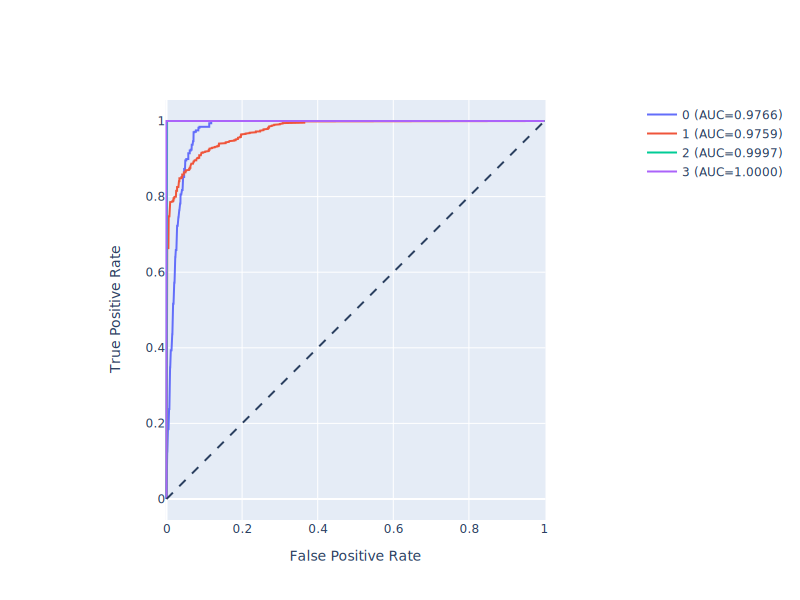

In [53]:
import plotly.graph_objects as go

classes = xgb_classifier.classes_
roc_auc_ovr = {}
# Create an empty figure, and iteratively add new lines
# every time we compute a new class
fig = go.Figure()
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = pd.DataFrame(X_test.copy(), columns= ['x', 'y'])
    df_aux['Class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)

    fpr, tpr, _ = roc_curve(df_aux['Class'], df_aux['prob'])
    roc_auc_ovr[c] = auc(fpr, tpr)

    name = f"{c} (AUC={roc_auc_ovr[c]:.4f})"
    fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))

fig.update_layout(
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    yaxis=dict(scaleanchor="x", scaleratio=1),
    xaxis=dict(constrain='domain'),
    width=800, height=600,
    showlegend=True)
fig.show("svg")

# MODEL SAVING

In [66]:
pickle.dump(knn_classifier, open('knn_model_thyroid.pickle', 'wb'))

In [67]:
pickle.dump(xgb_classifier, open('xgb_model_thyroid_1.pickle', 'wb'))

In [68]:
knn_model=pickle.load(open('knn_model_thyroid_1.pickle', 'rb'))

In [69]:
knn_model

KNeighborsClassifier(algorithm='kd_tree', leaf_size=10, n_jobs=-1,
                     n_neighbors=4)

In [4]:
xgb_model = pickle.load(open('xgb_model_thyroid_1.pickle', 'rb'))

In [51]:
xgb_model.score(X_train,y_train)

0.9431992337164751

In [72]:
ls

 Volume in drive C is OS
 Volume Serial Number is 9AC9-1379

 Directory of C:\Users\singh\0. Project - Thyroid disease detection

26-01-2023  02:03    <DIR>          .
13-01-2023  13:28    <DIR>          ..
26-01-2023  00:20    <DIR>          .idea
26-01-2023  00:43    <DIR>          .ipynb_checkpoints
26-01-2023  00:20             2,750 app.py
23-01-2023  11:39             6,453 app_thy.py
26-01-2023  00:45               325 enc.pickle
29-09-2022  16:28           306,546 hypothyroid.csv
26-01-2023  02:04         4,188,198 knn_model_thyroid_1.pickle
23-01-2023  17:05         1,440,817 Thyroid detection practise book.ipynb
26-01-2023  02:03         1,643,678 Thyroid disease detection  - Copy.ipynb
23-01-2023  17:06         1,792,043 Thyroid disease detection .ipynb
26-01-2023  02:04           487,679 xgb_model_thyroid_1.pickle
               9 File(s)      9,868,489 bytes
               4 Dir(s)  74,318,831,616 bytes free


In [85]:
np.array(X_test.head(10))

array([[ 47.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.,  49.,   2.,  55.],
       [ 73.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   3.,  99.,   2.,  77.],
       [ 61.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   3.,  70.,   2.,  72.],
       [ 33.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   3.,  77.,   2.,  76.],
       [ 47.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.,  49.,   2.,  55.],
       [ 43.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   3.,  62.,   2.,  75.],
       [  3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   3., 112.,   2., 137.],
       [ 42.,   1.,   0.,   0.,   0.,   0

#### Predictions

In [86]:
a = int(input('enter 1 if you want to use knn_model else enter 0 for xgb_model '))

if a==1:
    print('YOU ARE USING KNN MODEL')
    input_data = eval(input('Give health parameters of the person: '))

    #changing the input data to numpy_array
    input_data_as_numpy_array = np.asarray(input_data)

    #reshape the array as we are predicting for one instance
    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

    #predicting the condition of patient
    prediction = knn_model.predict(input_data_reshaped)
    print(prediction)

    if (prediction == 0):
        print('compensated_hypothyroid')

    elif (prediction == 1):
        print('negative')

    elif (prediction == 2):
        print('primary_hypothyroid')

    else:
        print('secondary_hypothyroid')
    print('knn executed')
    


elif a>1:
    print('please enter only 0 & 1')
    

else:

    print('YOU ARE USING XGB MODEL')
    input_data = eval(input('Give health parameters of the personx: '))

    #changing the input data to numpy_array
    input_data_as_numpy_array = np.asarray(input_data)

    #reshape the array as we are predicting for one instance
    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

    #predicting the condition of patient
    prediction = xgb_model.predict(input_data_reshaped)
    print(prediction)

    if (prediction == 0):
        print('compensated_hypothyroid')

    elif (prediction == 1):
        print('negative')

    elif (prediction == 2):
        print('primary_hypothyroid')

    else:
        print('secondary_hypothyroid')
    print('xgb executed')

print(" ")
print("-"*100)


enter 1 if you want to use knn_model else enter 0 for xgb_model 0
YOU ARE USING XGB MODEL
Give health parameters of the personx: 42.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,           0.,   0.,   0.,   0.,   0.,   3.,  23.,   2.,  58.
[3]
secondary_hypothyroid
xgb executed
 
----------------------------------------------------------------------------------------------------
